In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("medical.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
# Target variable: 1 for Diabetes, 0 otherwise
df['Diabetes'] = df['Diagnosis'].apply(lambda x: 1 if x == 'Diabetes' else 0)


In [5]:
# Clean data: drop rows with missing values in features
df_clean = df[['Age', 'Cholesterol', 'Heart_Rate', 'Diabetes']].dropna()


In [6]:
# Features and target
X = df_clean[['Age', 'Cholesterol', 'Heart_Rate']]
y = df_clean['Diabetes']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [8]:
# Create and train decision tree model
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [9]:
# Predict and evaluate
y_pred = clf.predict(X_test)


In [10]:

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



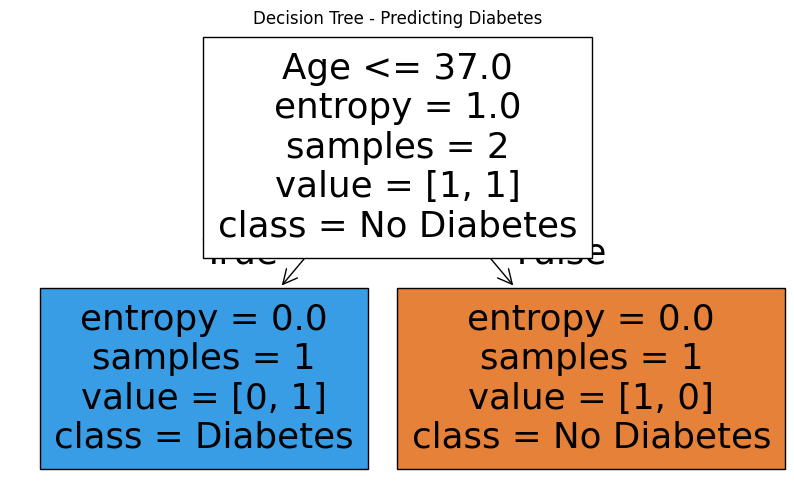

In [11]:
# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Age', 'Cholesterol', 'Heart_Rate'], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree - Predicting Diabetes")
plt.show()